# Simple Unet pipeline on synthetic data

# Create synth data and dataloaders

In [2]:
from synth_data import SynthData
from torch.utils.data import DataLoader
syndata = SynthData()

train_set_synthetic = SynthData(size=1000)
val_set_synthetic = SynthData(size=100)

batch_size = 25

dataloaders_synthetic = {
    'train': DataLoader(train_set_synthetic, batch_size=batch_size, shuffle=True, num_workers=2),
    'val': DataLoader(val_set_synthetic, batch_size=batch_size, shuffle=True, num_workers=2)
}

# Loading model

In [3]:
from nn.unet.models.resnet18 import ResNet18

model = ResNet18(in_channel=3, n_classes=6)

print(model)

ResNet18(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

# Training

In [4]:
import torch.optim as optim
from torch.optim import lr_scheduler
from nn import Trainer

optimizer_func = optim.Adam(model.parameters(), lr=1e-4)
scheduler = lr_scheduler.StepLR(optimizer_func, step_size=4, gamma=0.1)

trainer = Trainer(model, optimizer=optimizer_func, scheduler=scheduler)
trainer.train_model(dataloaders_synthetic, num_epochs=20)

Epoch 1/20:
	learning rate: 1.00e-04
	train-> bce:0.141246|dice:0.987343|iou:0.000122|loss:0.564295
	val  -> bce:0.028103|dice:0.970599|iou:0.000000|loss:0.499351
	Saving best model, epoch loss 0.499351 < best loss 10000000000.000000
	0m 24s
----------
Epoch 2/20:
	learning rate: 1.00e-04
	train-> bce:0.021769|dice:0.837473|iou:0.118422|loss:0.429621
	val  -> bce:0.017711|dice:0.736198|iou:0.202763|loss:0.376955
	Saving best model, epoch loss 0.376955 < best loss 0.499351
	0m 24s
----------
Epoch 3/20:
	learning rate: 1.00e-04
	train-> bce:0.018205|dice:0.573963|iou:0.367770|loss:0.296084
	val  -> bce:0.019781|dice:0.463774|iou:0.396781|loss:0.241778
	Saving best model, epoch loss 0.241778 < best loss 0.376955
	0m 24s
----------
Epoch 4/20:
	learning rate: 1.00e-04


KeyboardInterrupt: 

# Visualizing Results

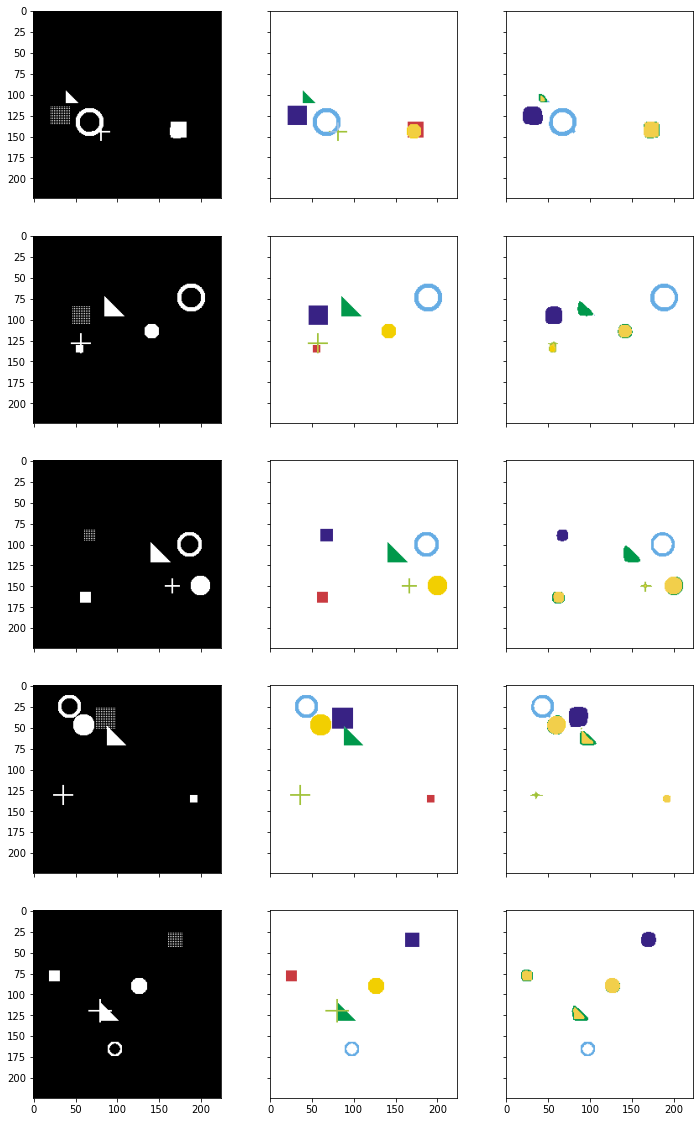

In [5]:
images, masks = next(iter(dataloaders_synthetic['val']))
preds = trainer.predict(images)

from utils.plot import plot_image_truemask_predictedmask
num_samples = 5
plot_image_truemask_predictedmask(images[:num_samples], masks[:num_samples], preds[:num_samples])